In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('COOH.csv')
df = df[df.columns[0:11]]
df = df.sort_values(by=['Ead-COOH'])
df = df.rename(columns={df.columns[0]: "top_site"})

df_dummy = df.copy(deep=True)
print(df.shape)
df.head()

(72, 11)


,top_site,B2,Nsur1,Nsur2,Nsur3,Nsur4,Nsur5,Nsub1,Nsub2,Nsub3,Ead-COOH
5,Co,Fe,Cu,Co,Cu,Co,Co,Cu,Cu,Fe,-0.996977
2,Co,Fe,Co,Co,Co,Fe,Ni,Fe,Fe,Cu,-0.957250
22,Ni,Fe,Co,Fe,Fe,Cu,Fe,Fe,Fe,Mo,-0.918087
6,Co,Co,Cu,Co,Co,Fe,Cu,Cu,Cu,Fe,-0.897827
0,Co,Fe,Ni,Fe,Co,Co,Co,Fe,Fe,Cu,-0.892219


In [3]:
df_hist = df['Ead-COOH']

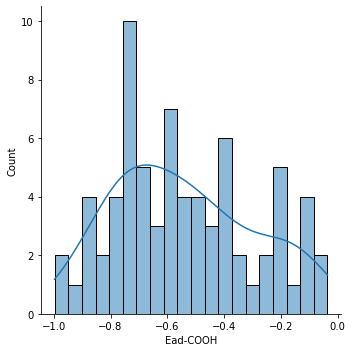

In [4]:
sns.displot(df_hist,bins=20,kde=True)

In [5]:
print('top sites')
print(df[df.columns[0]].value_counts())
print('secondary top sites')
print(df[df.columns[1]].value_counts())

top sites
Co    24
Cu    19
Fe    19
Ni    10
Name: top_site, dtype: int64
secondary top sites
Co    22
Fe    22
Cu    20
Ni     8
Name: B2, dtype: int64


In [6]:
top33_df = df.iloc[:24]
mid33_df = df.iloc[24:48]
bot33_df = df.iloc[48:]

In [7]:
print(top33_df[df.columns[0]].value_counts())
print(top33_df[df.columns[1]].value_counts())

print(mid33_df[df.columns[0]].value_counts())
print(mid33_df[df.columns[1]].value_counts())

print(bot33_df[df.columns[0]].value_counts())
print(bot33_df[df.columns[1]].value_counts())

Co    16
Ni     5
Fe     3
Name: top_site, dtype: int64
Fe    14
Co     7
Ni     2
Cu     1
Name: B2, dtype: int64
Fe    11
Co     8
Ni     4
Cu     1
Name: top_site, dtype: int64
Cu    10
Co     9
Fe     3
Ni     2
Name: B2, dtype: int64
Cu    18
Fe     5
Ni     1
Name: top_site, dtype: int64
Cu    9
Co    6
Fe    5
Ni    4
Name: B2, dtype: int64


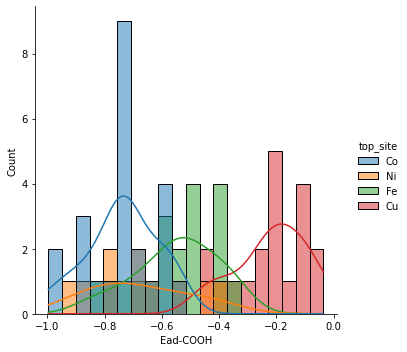

In [8]:
sns.displot(data=df, x='Ead-COOH',hue='top_site',
            kind='hist', bins=20,kde=True,fill=True,)

Text(0.5, 1.0, 'COOH')

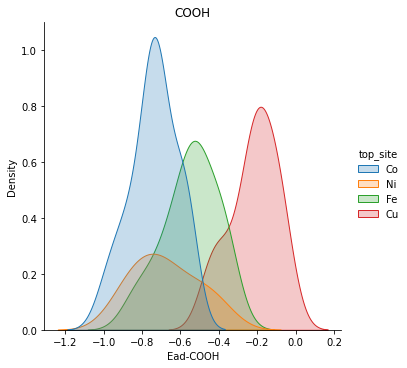

In [9]:
sns.displot(data=df, x='Ead-COOH',hue='top_site',
            kind='kde',fill=True,)
plt.title('COOH')

Text(0.5, 1.0, 'COOH')

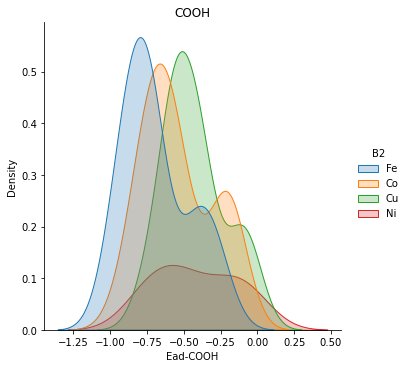

In [10]:
sns.displot(data=df, x='Ead-COOH',hue='B2',
            kind='kde',fill=True,)
plt.title('COOH')

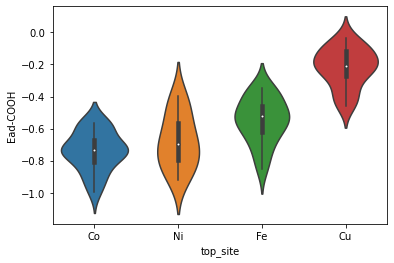

In [11]:
#violinplot
#plt.rcParams.update(
 #   {
  #      'text.usetex': False,
   #     'font.family': 'stixgeneral',
    #    'mathtext.fontset': 'stix',
    #}
#)
ax = sns.violinplot(x=df.columns[0], y="Ead-COOH", data=df)

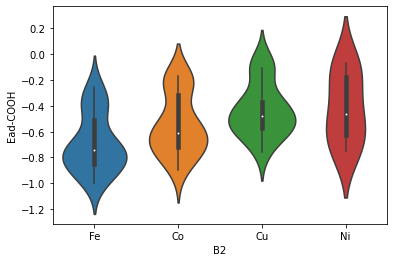

In [12]:
#violinplot
#plt.rcParams.update(
 #   {
  #      'text.usetex': False,
   #     'font.family': 'stixgeneral',
    #    'mathtext.fontset': 'stix',
    #}
#)
ax = sns.violinplot(x=df.columns[1], y="Ead-COOH", data=df)

(-1.108229269562523,
 1.1003918986236563,
 -1.1100214356533469,
 1.1004772198297181)

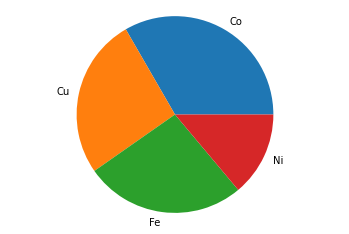

In [13]:
xs = df['top_site'].value_counts()
#print(xs)
#xs = [2, 5, 3] # 20% of pie, 50% of pie, and 30% of pie
plt.pie(xs,labels=list(xs.index))
#plt.rcParams['font.size'] = 90.0
plt.axis("equal")

Text(0.5, 1.0, 'secondary top site')

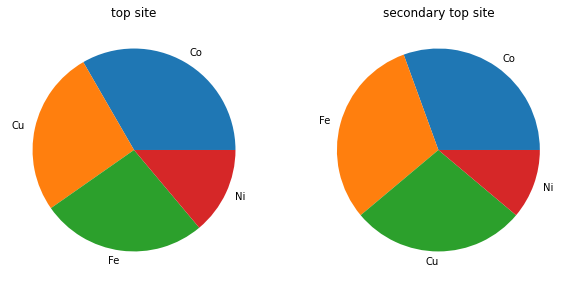

In [14]:
xs = df['top_site'].value_counts()
xz = df['B2'].value_counts()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(xs,labels=list(xs.index))
ax1.set_title('top site')

ax2.pie(xz,labels=list(xz.index))
ax2.set_title('secondary top site')

In [15]:
elements = ['Cu', 'Co', 'Ni', 'Fe']
def count_sur_elements1(ele):
    sur1 = df['Nsur1'].value_counts()
    sur2 = df['Nsur2'].value_counts()
    sur3 = df['Nsur3'].value_counts()
    sur4 = df['Nsur4'].value_counts()
    sur5 = df['Nsur5'].value_counts()
    
    total_count = sur1[ele]+sur2[ele]+sur3[ele]+sur4[ele]+sur5[ele]
    print(ele,total_count)
    return ele, total_count

counter= np.empty((4,2))
names = []
total=[]
for i in range(len(elements)):
    elename, tot = count_sur_elements1(elements[i])
    names.append(elename)
    total.append(tot)
total = np.array(total)
total = total.reshape(1,4)
data_everything = pd.DataFrame(data=total,columns=names)

print(sum(sum(total)))
data_everything.head()

Cu 122
Co 110
Ni 45
Fe 83
360


,Cu,Co,Ni,Fe
0,122,110,45,83


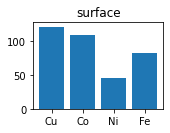

In [16]:
x = total.tolist()
fig = plt.figure()
ax = fig.add_axes([0,0,0.3,0.3])
ax.bar(names,x[0])
ax.set_title('surface')
plt.show()

In [17]:
elements = ['Cu','Fe','Mo']
def count_sub_elements(ele):
    sub1 = df['Nsub1'].value_counts()
    sub2 = df['Nsub2'].value_counts()
    sub3 = df['Nsub3'].value_counts()
    
    total_count = sub1[ele]+sub2[ele]+sub3[ele]
    print(ele,total_count)
    return ele, total_count

counter= np.empty((3,2))
names2 = []
total2=[]
for i in range(len(elements)):
    elename, tot = count_sub_elements(elements[i])
    names2.append(elename)
    total2.append(tot)
print(total2)
total2 = np.array(total2)
total2 = total2.reshape(1,3)
data_best = pd.DataFrame(data=total2,columns=names2)

print(sum(sum(total)))
data_best.head()

Cu 47
Fe 99
Mo 70
[47, 99, 70]
360


,Cu,Fe,Mo
0,47,99,70


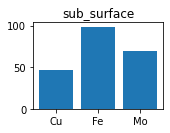

In [18]:
x = total2.tolist()
fig = plt.figure()
ax = fig.add_axes([0,0,0.3,0.3])
ax.bar(names2,x[0])
ax.set_title('sub_surface')
plt.show()

In [19]:
neighbor_counts = df.copy(deep=True)
x = neighbor_counts.loc[1]

surface_indexs = x.index[2:7]
subsurface_indexs = x.index[7:10]

surface_indexs = pd.Series(surface_indexs)
subsurface_indexs = pd.Series(subsurface_indexs)

In [20]:
neighbor_counts = df.copy(deep=True)
surface_analysis = np.empty((neighbor_counts.shape[0],6))

surface_analysis[:,-1] = np.array(neighbor_counts['Ead-COOH'])

for j in range(neighbor_counts.shape[0]):
    index = neighbor_counts.index[j]
    x = neighbor_counts.loc[index]
    Mo = 0
    Co = 0
    Fe = 0
    Ni = 0
    Cu = 0
    
    for i in surface_indexs:
        if x[i] == 'Mo':
            Mo +=1
        elif x[i] == 'Co':
            Co +=1
        elif x[i] == 'Cu':
            Cu +=1
        elif x[i] == 'Ni':
            Ni +=1
        elif x[i] == 'Fe':
            Fe +=1
    p=[Mo,Co,Fe,Ni,Cu]
    
    surface_analysis[j,0:5] = p
    for k in range(5):
        if surface_analysis[j,k] >10:
            surface_analysis[j,k] = 0
surface_analysis = pd.DataFrame(surface_analysis, columns=['Mo sur #','Co sur #','Fe sur #','Ni sur #','Cu sur #','Ead-COOH'])
surface_analysis.head()

,Mo sur #,Co sur #,Fe sur #,Ni sur #,Cu sur #,Ead-COOH
0,0.0,3.0,0.0,0.0,2.0,-0.996977
1,0.0,3.0,1.0,1.0,0.0,-0.957250
2,0.0,1.0,3.0,0.0,1.0,-0.918087
3,0.0,2.0,1.0,0.0,2.0,-0.897827
4,0.0,3.0,1.0,1.0,0.0,-0.892219


In [21]:
neighbor_counts = df.copy(deep=True)
subsurface_analysis = np.empty((neighbor_counts.shape[0],6))

subsurface_analysis[:,-1] = np.array(neighbor_counts['Ead-COOH'])

for j in range(neighbor_counts.shape[0]):
    index = neighbor_counts.index[j]
    x = neighbor_counts.loc[index]
    Mo = 0
    Co = 0
    Fe = 0
    Ni = 0
    Cu = 0
    
    for i in subsurface_indexs:
        if x[i] == 'Mo':
            Mo +=1
        elif x[i] == 'Co':
            Co +=1
        elif x[i] == 'Cu':
            Cu +=1
        elif x[i] == 'Ni':
            Ni +=1
        elif x[i] == 'Fe':
            Fe +=1
    p=[Mo,Co,Fe,Ni,Cu]
    
    subsurface_analysis[j,0:5] = p
    for k in range(5):
        if subsurface_analysis[j,k] >10:
            subsurface_analysis[j,k] = 0
subsurface_analysis = pd.DataFrame(subsurface_analysis, columns=['Mo sub #','Co sub #','Fe sub #','Ni sub #','Cu sub #','Ead-COOH'])
subsurface_analysis.head()

,Mo sub #,Co sub #,Fe sub #,Ni sub #,Cu sub #,Ead-COOH
0,0.0,0.0,1.0,0.0,2.0,-0.996977
1,0.0,0.0,2.0,0.0,1.0,-0.957250
2,1.0,0.0,2.0,0.0,0.0,-0.918087
3,0.0,0.0,1.0,0.0,2.0,-0.897827
4,0.0,0.0,2.0,0.0,1.0,-0.892219


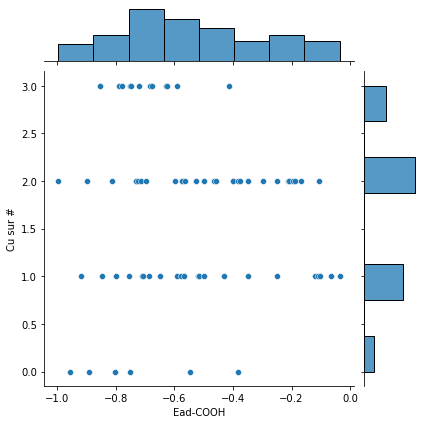

In [22]:
sns.jointplot(data=surface_analysis,x=surface_analysis['Ead-COOH'],y=surface_analysis.columns[4])

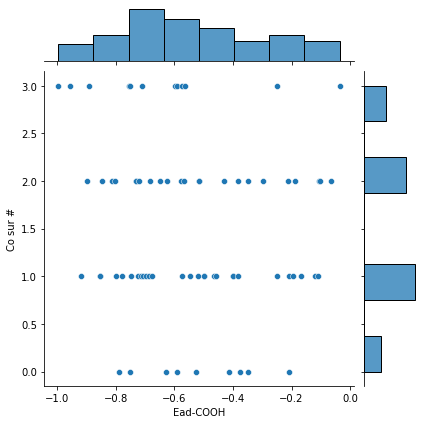

In [23]:
sns.jointplot(data=surface_analysis,x=surface_analysis['Ead-COOH'],y=surface_analysis.columns[1])

In [24]:

print( subsurface_analysis['Ni sub #'].value_counts())
print(subsurface_analysis)

0.0    72
Name: Ni sub #, dtype: int64
    Mo sub #  Co sub #  Fe sub #  Ni sub #  Cu sub #  Ead-COOH
0        0.0       0.0       1.0       0.0       2.0 -0.996977
1        0.0       0.0       2.0       0.0       1.0 -0.957250
2        1.0       0.0       2.0       0.0       0.0 -0.918087
3        0.0       0.0       1.0       0.0       2.0 -0.897827
4        0.0       0.0       2.0       0.0       1.0 -0.892219
..       ...       ...       ...       ...       ...       ...
67       2.0       0.0       1.0       0.0       0.0 -0.109122
68       1.0       0.0       2.0       0.0       0.0 -0.104581
69       1.0       0.0       2.0       0.0       0.0 -0.103805
70       1.0       0.0       2.0       0.0       0.0 -0.065604
71       2.0       0.0       0.0       0.0       1.0 -0.035987

[72 rows x 6 columns]


In [25]:
surface_analysis = surface_analysis.drop(columns=['Mo sur #'])
relevance_sur = surface_analysis.corr()

relevance_sur = relevance_sur['Ead-COOH']

<AxesSubplot:>

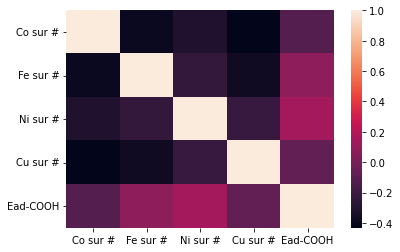

In [26]:
sns.heatmap(surface_analysis.corr())

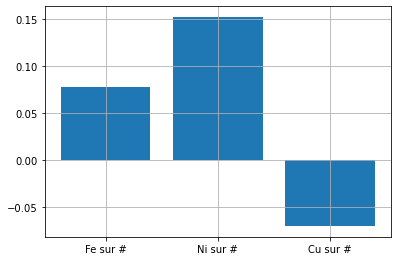

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
ax.bar(relevance_sur.index[1:-1],relevance_sur[1:-1])
#fig.title('surface analysis')
ax.grid(True)
plt.show()

In [28]:
subsurface_analysis = subsurface_analysis.drop(columns=['Co sub #','Ni sub #'])
relevance_sub = subsurface_analysis.corr()
relevance_sub = relevance_sub['Ead-COOH']
#relevance_sub

<AxesSubplot:>

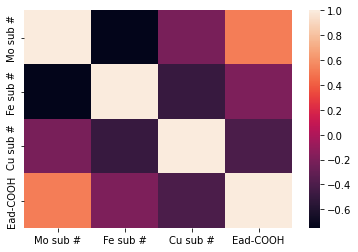

In [29]:
sns.heatmap(subsurface_analysis.corr())

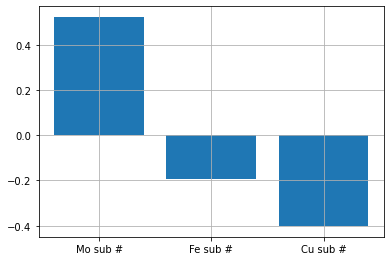

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
ax.bar(relevance_sub.index[:-1],relevance_sub[:-1])
#fig.title('surface analysis')
ax.grid(True)
plt.show()

In [31]:
r_sub =relevance_sub[relevance_sub.index[0:3]]
r_sur =relevance_sur[relevance_sur.index[0:4]]
print(r_sub,r_sur)

Mo sub #    0.523044
Fe sub #   -0.192818
Cu sub #   -0.402595
Name: Ead-COOH, dtype: float64 Co sur #   -0.118338
Fe sur #    0.077730
Ni sur #    0.152640
Cu sur #   -0.070667
Name: Ead-COOH, dtype: float64


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

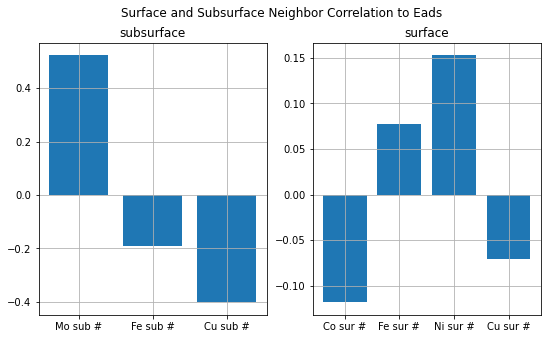

In [32]:
rows = 1
cols = 2
size = (9, 5)
fig, (ax1, ax2) = plt.subplots(rows, cols, figsize = size)

# Plot on ax1
ax1.bar(r_sub.index,r_sub)
ax1.set_title('subsurface')
ax1.grid(True)
# Plot on ax2
ax2.bar(r_sur.index,r_sur)
ax2.set_title('surface')
ax2.grid(True)

fig.suptitle('Surface and Subsurface Neighbor Correlation to Eads')
plt.tight_layout

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

#import category_encoders as ce

In [34]:
x = subsurface_analysis.columns
x = np.array(x)
x[0:-1]
y = surface_analysis.columns
y = np.array(y)
y[0:-1]
#subsurface_analysis.head(1)
subsurfs = subsurface_analysis[x[0:-1]]
surfs = surface_analysis[y[0:-1]]
tester = pd.get_dummies(df_dummy['top_site'])

sample = pd.concat([tester,surfs], axis=1)
#sample = pd.concat([sample,surfs], axis=1)
sample = pd.concat([sample, subsurfs], axis=1)
sample = pd.concat([sample, surface_analysis['Ead-COOH']], axis=1)

In [35]:
from pylab import rcParams

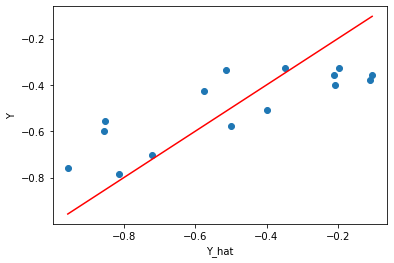

MAE in eV: 0.1551689752838868


In [36]:
x = sample.columns
X = sample[x[0:-1]]
X.shape
Y = sample['Ead-COOH']

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_hat = regr.predict(X_test)

lineStart = y_test.min() 
lineEnd = y_test.max()

plt.scatter(y_test, y_hat)
#plt.xlim(-2.2,  -1.7)
#plt.ylim(-2.2,  -1.7)
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
rcParams['figure.figsize'] = 3,3
plt.show()

print('MAE in eV: ' + str(mean_absolute_error(y_test, y_hat)))

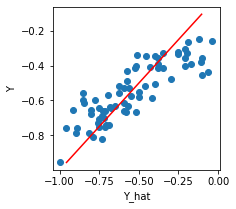

MAE in eV: 0.10792477150837458


In [37]:
y_hat = regr.predict(X)
plt.scatter(Y, y_hat)
#plt.xlim(-2.2,  -1.7)
#plt.ylim(-2.2,  -1.7)
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.show()
print('MAE in eV: ' + str(mean_absolute_error(Y, y_hat)))

In [38]:
surface_analysis.head()

,Co sur #,Fe sur #,Ni sur #,Cu sur #,Ead-COOH
0,3.0,0.0,0.0,2.0,-0.996977
1,3.0,1.0,1.0,0.0,-0.957250
2,1.0,3.0,0.0,1.0,-0.918087
3,2.0,1.0,0.0,2.0,-0.897827
4,3.0,1.0,1.0,0.0,-0.892219


In [39]:
ff = neighbor_counts.iloc[0:5].head(10)
ff

,top_site,B2,Nsur1,Nsur2,Nsur3,Nsur4,Nsur5,Nsub1,Nsub2,Nsub3,Ead-COOH
5,Co,Fe,Cu,Co,Cu,Co,Co,Cu,Cu,Fe,-0.996977
2,Co,Fe,Co,Co,Co,Fe,Ni,Fe,Fe,Cu,-0.957250
22,Ni,Fe,Co,Fe,Fe,Cu,Fe,Fe,Fe,Mo,-0.918087
6,Co,Co,Cu,Co,Co,Fe,Cu,Cu,Cu,Fe,-0.897827
0,Co,Fe,Ni,Fe,Co,Co,Co,Fe,Fe,Cu,-0.892219


In [40]:
surface_analysis.head()

,Co sur #,Fe sur #,Ni sur #,Cu sur #,Ead-COOH
0,3.0,0.0,0.0,2.0,-0.996977
1,3.0,1.0,1.0,0.0,-0.957250
2,1.0,3.0,0.0,1.0,-0.918087
3,2.0,1.0,0.0,2.0,-0.897827
4,3.0,1.0,1.0,0.0,-0.892219


In [41]:
subsurface_analysis.head()

,Mo sub #,Fe sub #,Cu sub #,Ead-COOH
0,0.0,1.0,2.0,-0.996977
1,0.0,2.0,1.0,-0.957250
2,1.0,2.0,0.0,-0.918087
3,0.0,1.0,2.0,-0.897827
4,0.0,2.0,1.0,-0.892219
